# Sample 15arc-sec GEBCO_2023.nc on OM4p25 grid

## Apply edits to the topography.

## Region 16: 30,50,-15,60,

In [1]:
# Notebook editor: Brandon Reichl (based on Alistair Adcroft)

# This notebook originated from Stephen Griffies, with many other contributors:
# Stephen.Griffies
# Alistair.Adcroft
# Robert.Hallberg
# Niki.Zadeh
# Raphael.Dussin

In [2]:
Region_Boundaries = [30,50,-15,60]
Region_Name = '21: Med Sea'

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import netCDF4
import xarray as xr
import cmocean
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import sys
sys.path.insert(1, './tools/')
from topo_tools import *

Resolution = 240 cells/degree
GEBCO loaded with (nj,ni) =  (43200, 86400)  min(lon) =  -300.0  max(lon) =  60.0


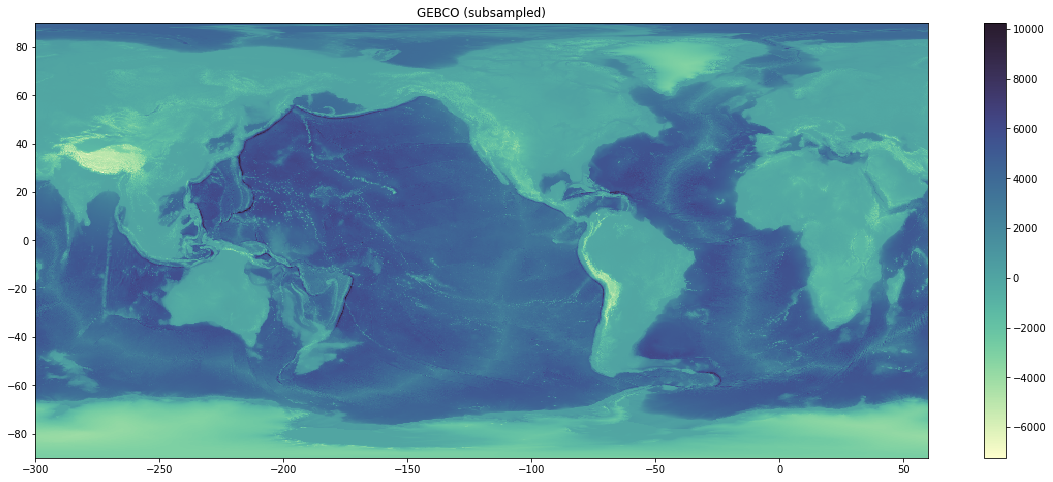

In [4]:
# GEBCO-2020 + Bedmachine combined topography 

fname_gebco  = "/archive/gold/datasets/topography/GEBCO_2023/GEBCO_2023.nc"

GEBCO = GEBCO_data(fname_gebco)

plt.figure(figsize=(20,8))
plt.pcolormesh(GEBCO.lonq[::100], GEBCO.latq[::100], GEBCO.depth[::100,::100], cmap=cmocean.cm.deep)
plt.colorbar(); plt.title('GEBCO (subsampled)');

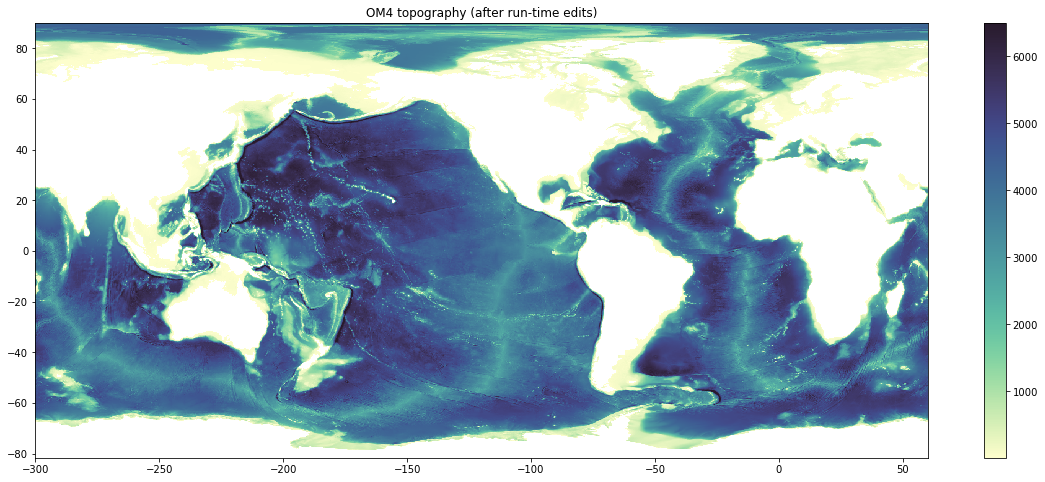

In [5]:
OM4 = OM4_data('/archive/gold/datasets/OM4_025/mosaic.v20170622.unpacked/ocean_hgrid.nc',
               '/archive/gold/datasets/OM4_025/mosaic.v20170622.unpacked/ocean_static.nc',
               '/archive/gold/datasets/OM4_025/mosaic.v20170622.unpacked/ocean_mask.nc')
plt.figure(figsize=(20,8))
plt.pcolormesh(OM4.lonq, OM4.latq, OM4.depth, cmap=cmocean.cm.deep)
plt.colorbar(); plt.title('OM4 topography (after run-time edits)');

OM5 longitudes are inconsistent!
OM5 latitudes are inconsistent!


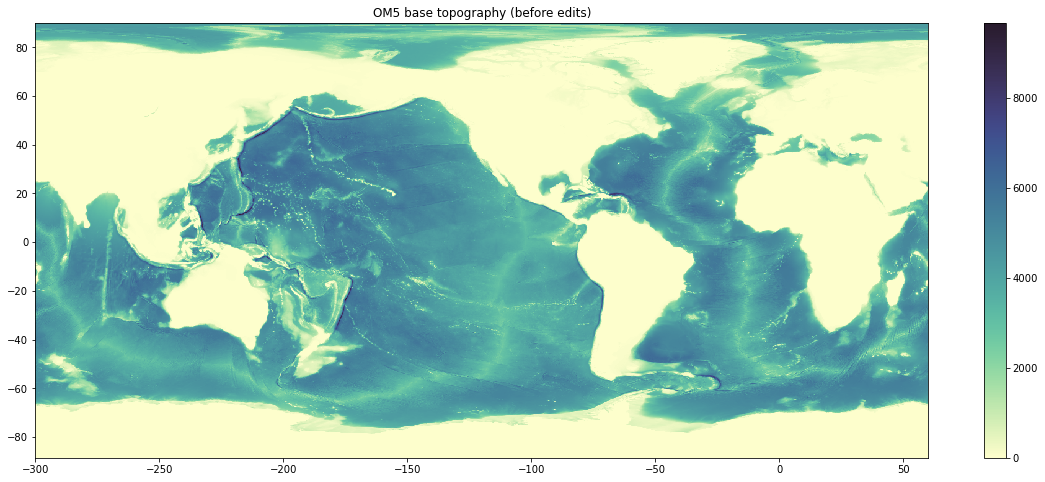

In [6]:
OM5 = OM5_data('ocean_hgrid.nc',
               'regridded_source_topog.nc')

plt.figure(figsize=(20,8))
plt.pcolormesh(OM5.lonq, OM5.latq, OM5.depth, cmap=cmocean.cm.deep)
plt.colorbar(); plt.title('OM5 base topography (before edits)');

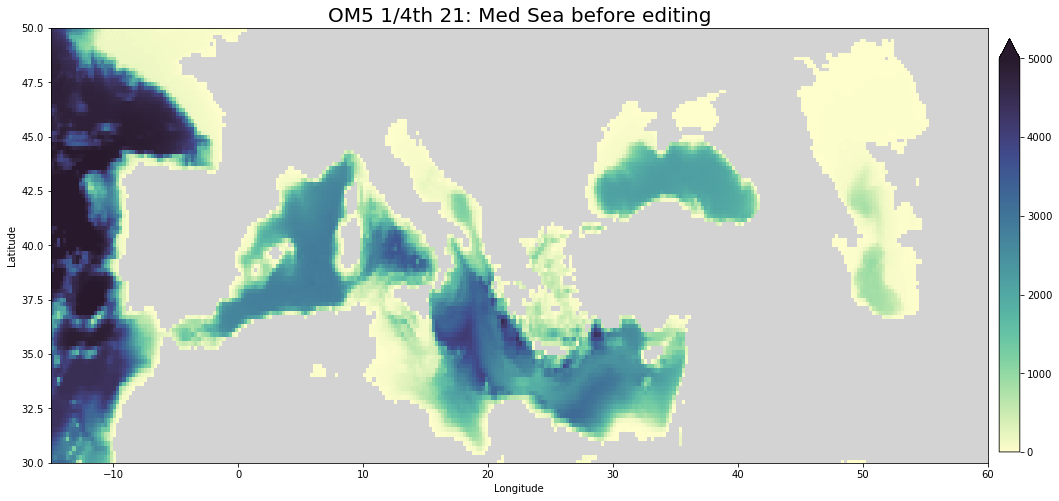

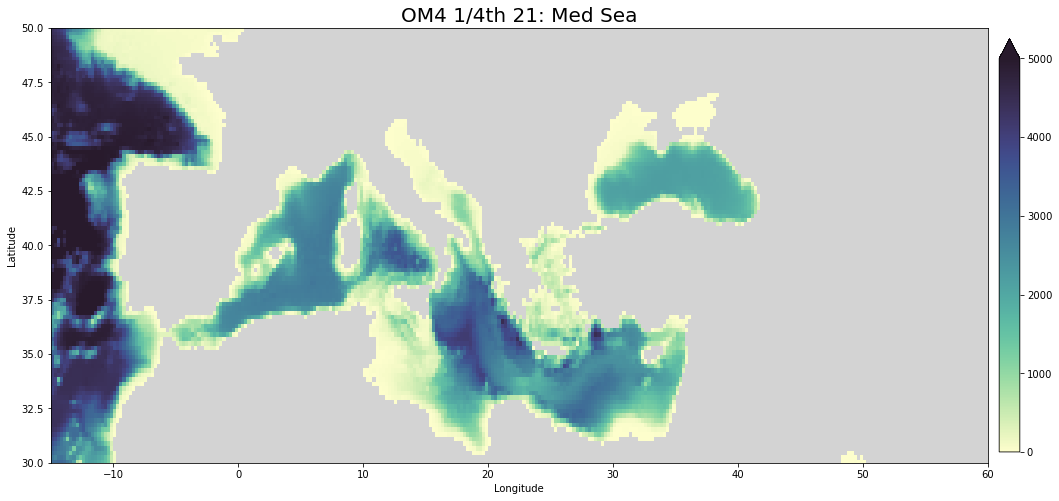

In [7]:
# Broad view of region before edits 

broadview(OM4,OM5,
          (Region_Boundaries[2],Region_Boundaries[3]),
          (Region_Boundaries[0],Region_Boundaries[1]),
          0, 5000, Region_Name, om4=True, new=False)

Gebco (js:je,is:ie) = 28799:31199,68399:70799
OM4 model (js:je,is:ie) = 628:679,1138:1180
OM5 model (js:je,is:ie) = 709:760,1138:1180
Using xlim = (-15.0, -5.0) ylim = (30.0, 40.0)
Gebco (js:je,is:ie) = 31199:33599,68399:70799
OM4 model (js:je,is:ie) = 677:736,1138:1180
OM5 model (js:je,is:ie) = 758:817,1138:1180
Using xlim = (-15.0, -5.0) ylim = (40.0, 50.0)


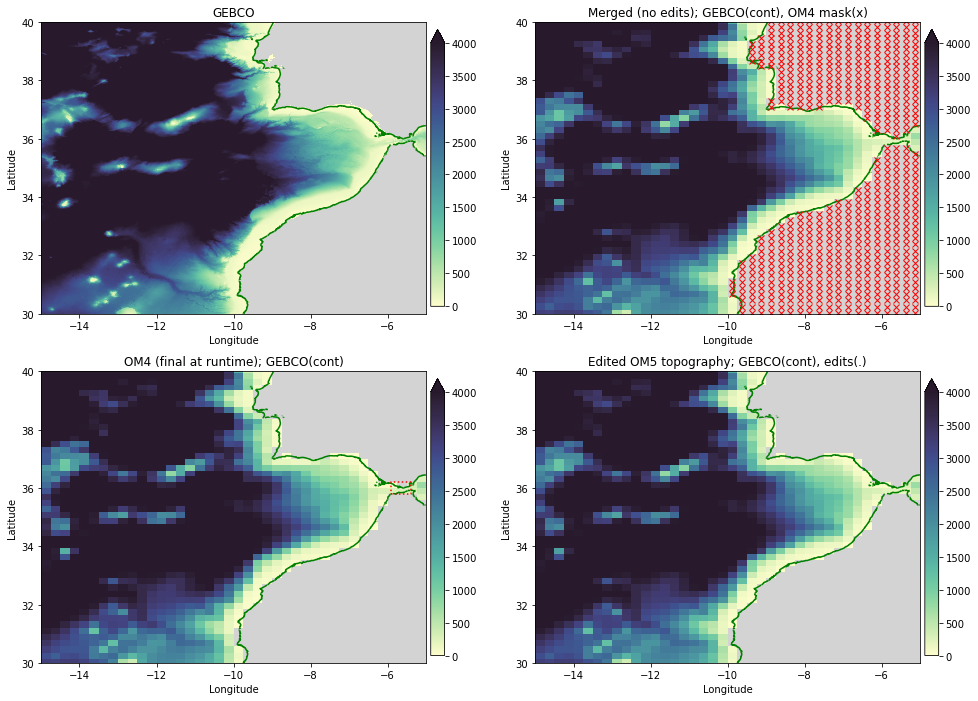

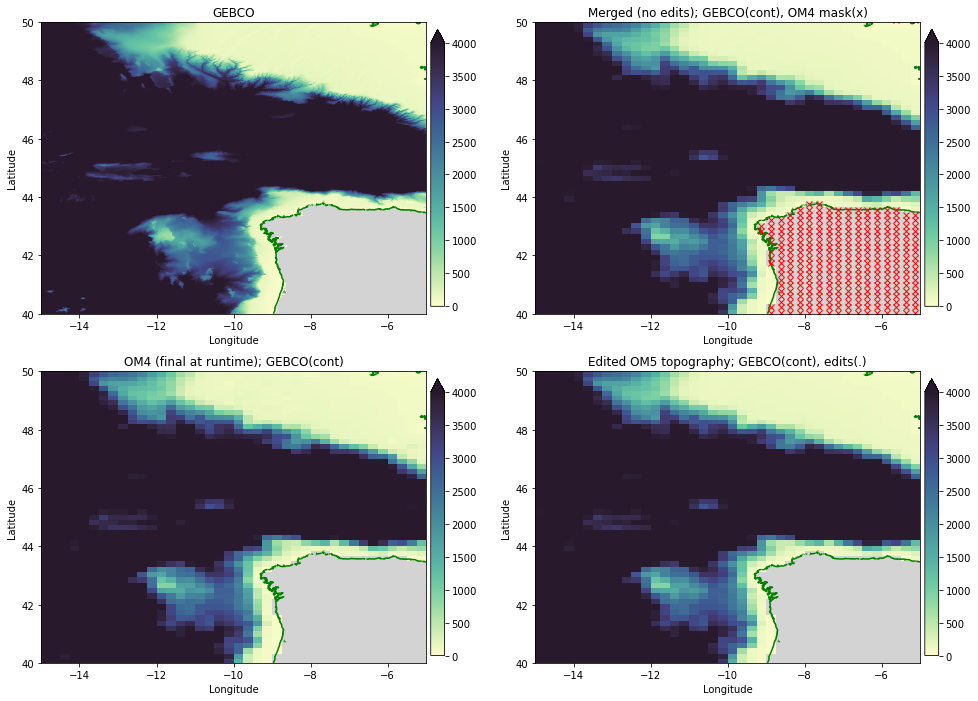

In [8]:
region = Region(-10, 35, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);

region = Region(-10, 45, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);


Gebco (js:je,is:ie) = 28799:31199,69599:71999
OM4 model (js:je,is:ie) = 628:679,1158:1200
OM5 model (js:je,is:ie) = 709:760,1158:1200
Using xlim = (-10.0, 0.0) ylim = (30.0, 40.0)
Gebco (js:je,is:ie) = 31199:33599,69599:71999
OM4 model (js:je,is:ie) = 677:736,1158:1200
OM5 model (js:je,is:ie) = 758:817,1158:1200
Using xlim = (-10.0, 0.0) ylim = (40.0, 50.0)


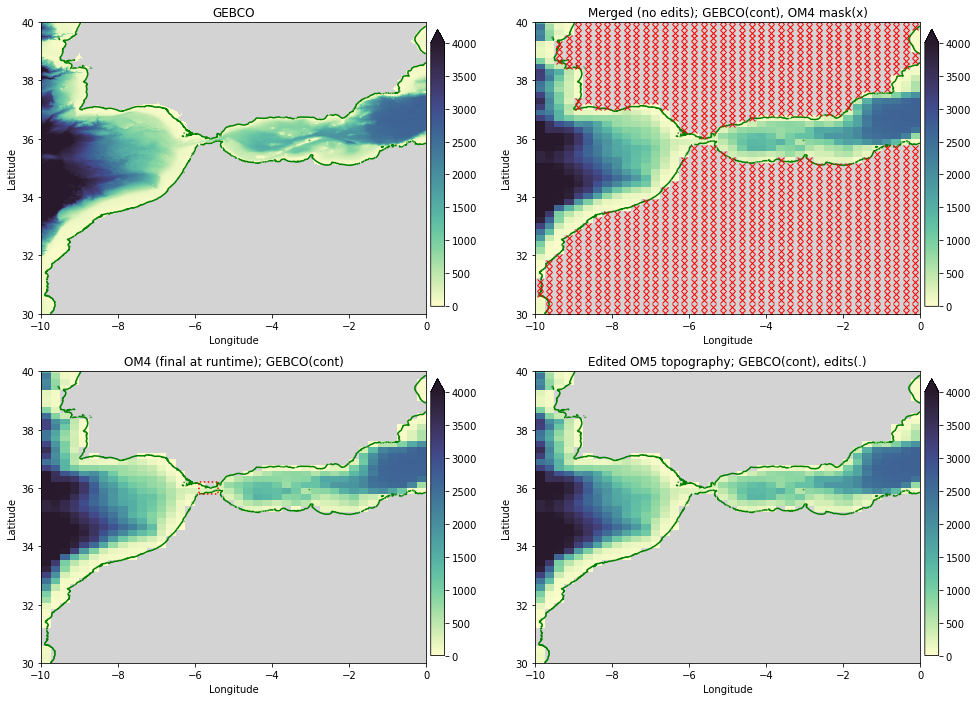

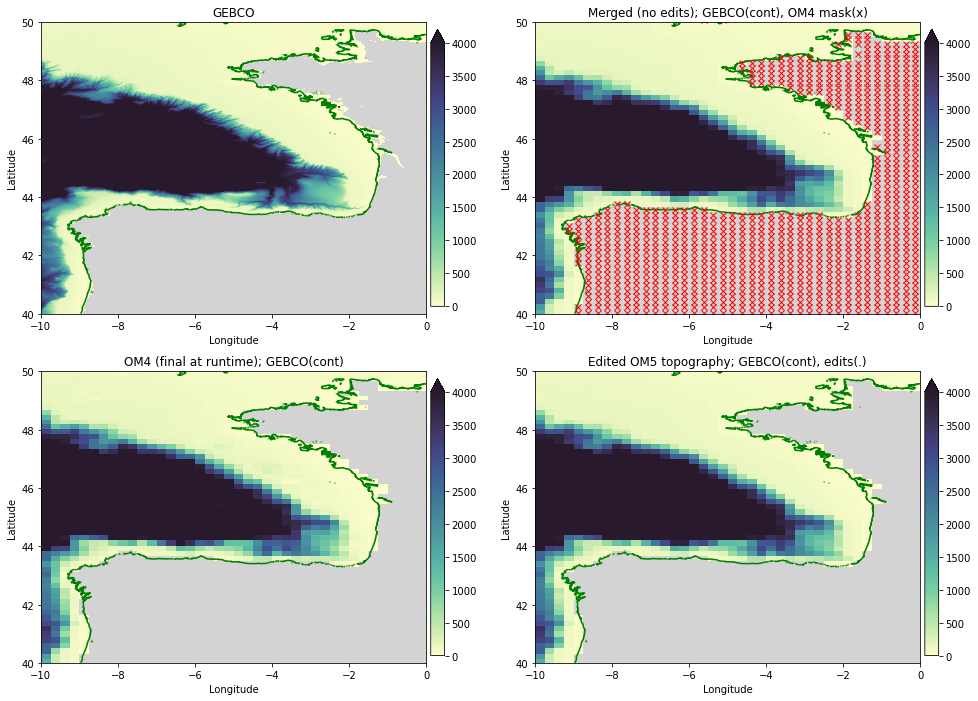

In [9]:
region = Region(-5, 35, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);

region = Region(-5, 45, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);


Gebco (js:je,is:ie) = 30119:30359,70464:70895
OM4 model (js:je,is:ie) = 654:661,1173:1182
OM5 model (js:je,is:ie) = 735:742,1173:1182
Using xlim = (-6.4, -4.6) ylim = (35.5, 36.5)


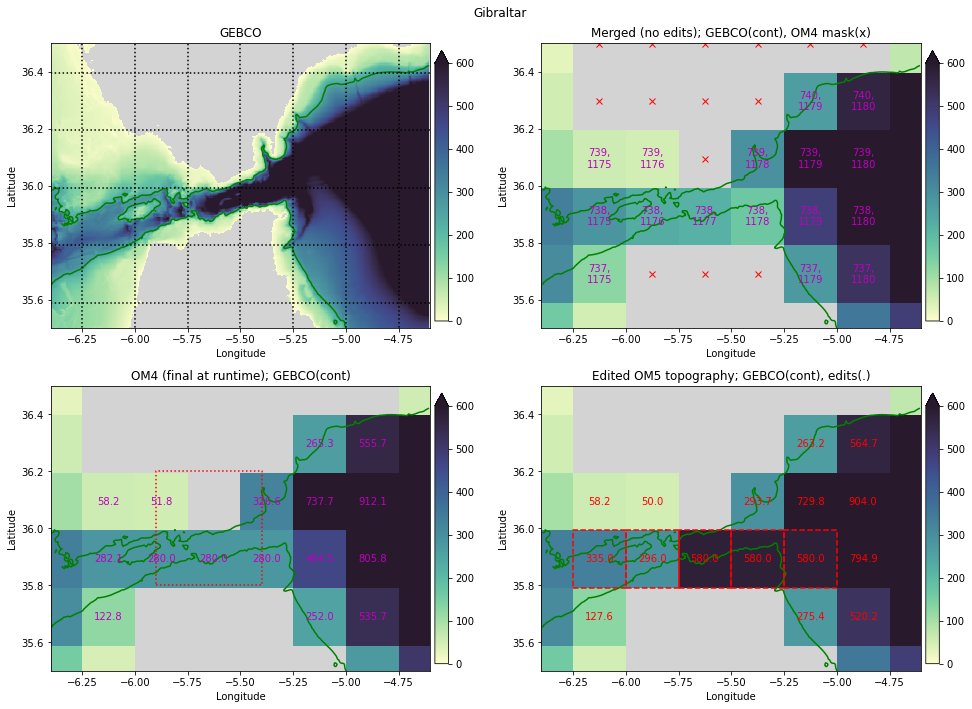

In [10]:
#from AJA

OM5.depth[738,1175] = 335.0
OM5.depth[738,1176] = 296.0 # GEBCO diagnosed sill depth, Legg et al. 2008 says 280m
OM5.depth[738,1177] = 580.0
OM5.depth[738,1178] = 580.0
OM5.depth[738,1179] = 580.0

region = Region(-5.50, 36., width_lon=1.8, width_lat=1.0)
map_region(region, 0, 600, GEBCO, OM4, OM5, 'Gibraltar', gebco_contours=[250] )#, sill_check=[(-6.2,35.8,-4.8,36.1)])

Gebco (js:je,is:ie) = 28799:31199,71999:74399
OM4 model (js:je,is:ie) = 628:679,1198:1240
OM5 model (js:je,is:ie) = 709:760,1198:1240
Using xlim = (0.0, 10.0) ylim = (30.0, 40.0)
Gebco (js:je,is:ie) = 31199:33599,71999:74399
OM4 model (js:je,is:ie) = 677:736,1198:1240
OM5 model (js:je,is:ie) = 758:817,1198:1240
Using xlim = (0.0, 10.0) ylim = (40.0, 50.0)


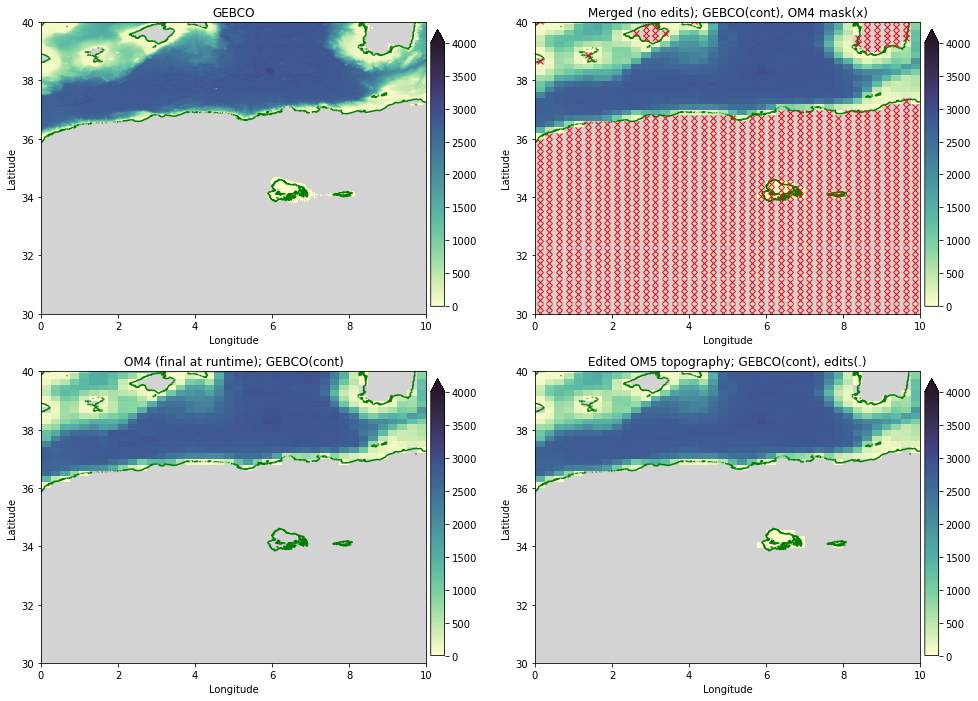

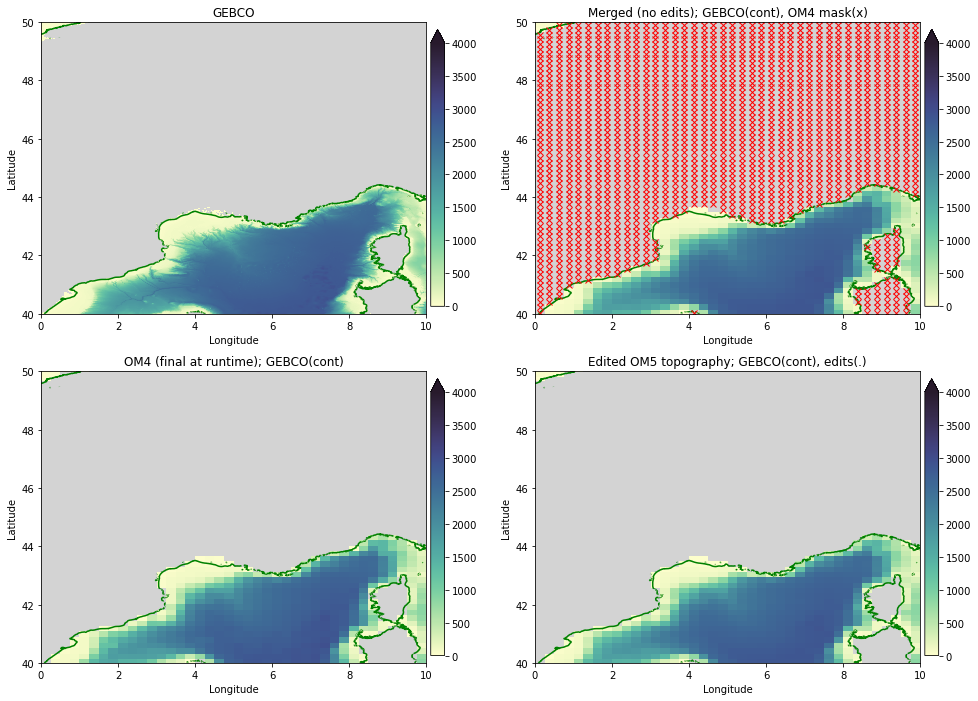

In [11]:
region = Region(5, 35, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);

region = Region(5, 45, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);


Gebco (js:je,is:ie) = 28799:31199,74399:76799
OM4 model (js:je,is:ie) = 628:679,1238:1280
OM5 model (js:je,is:ie) = 709:760,1238:1280
Using xlim = (10.0, 20.0) ylim = (30.0, 40.0)
Gebco (js:je,is:ie) = 31199:33599,74399:76799
OM4 model (js:je,is:ie) = 677:736,1238:1280
OM5 model (js:je,is:ie) = 758:817,1238:1280
Using xlim = (10.0, 20.0) ylim = (40.0, 50.0)


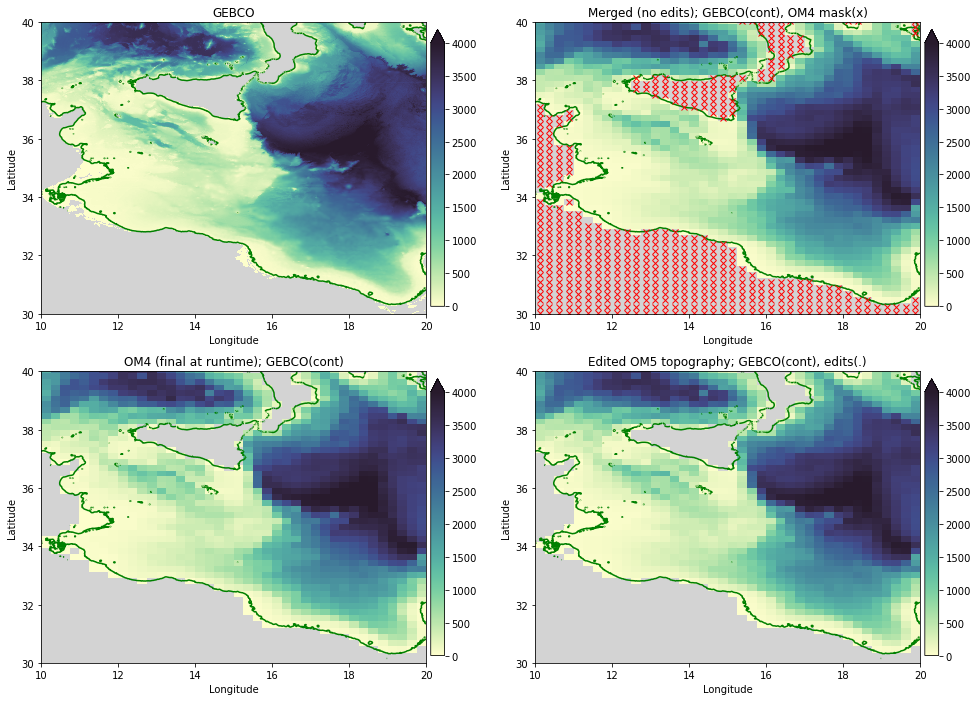

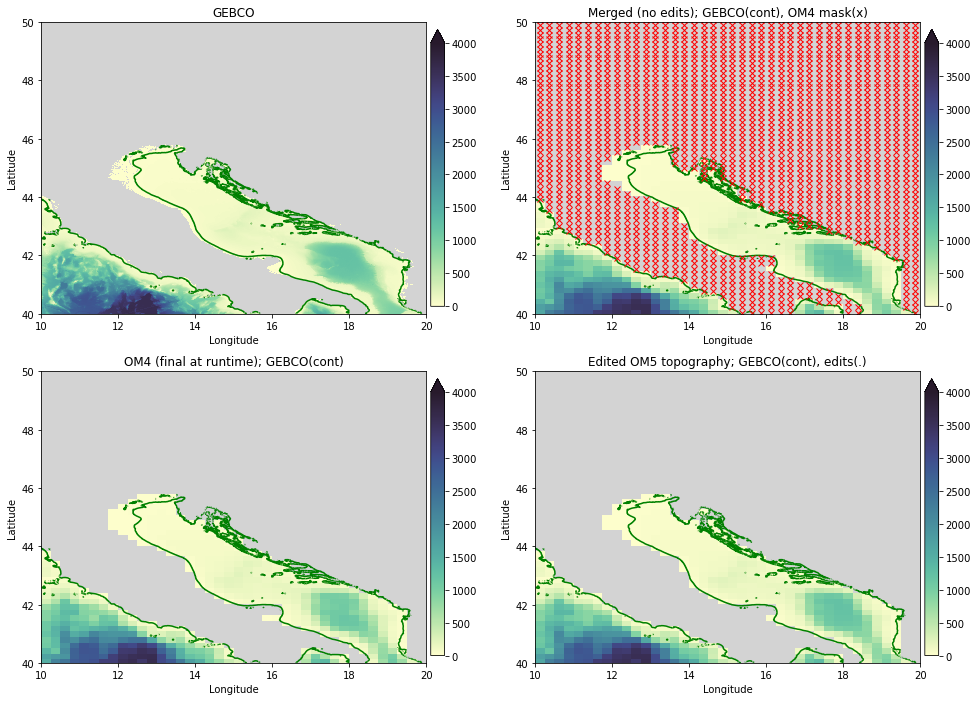

In [12]:
region = Region(15, 35, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);

region = Region(15, 45, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);


Gebco (js:je,is:ie) = 28799:31199,76799:79199
OM4 model (js:je,is:ie) = 628:679,1278:1320
OM5 model (js:je,is:ie) = 709:760,1278:1320
Using xlim = (20.0, 30.0) ylim = (30.0, 40.0)
Gebco (js:je,is:ie) = 31199:33599,76799:79199
OM4 model (js:je,is:ie) = 677:736,1278:1320
OM5 model (js:je,is:ie) = 758:817,1278:1320
Using xlim = (20.0, 30.0) ylim = (40.0, 50.0)


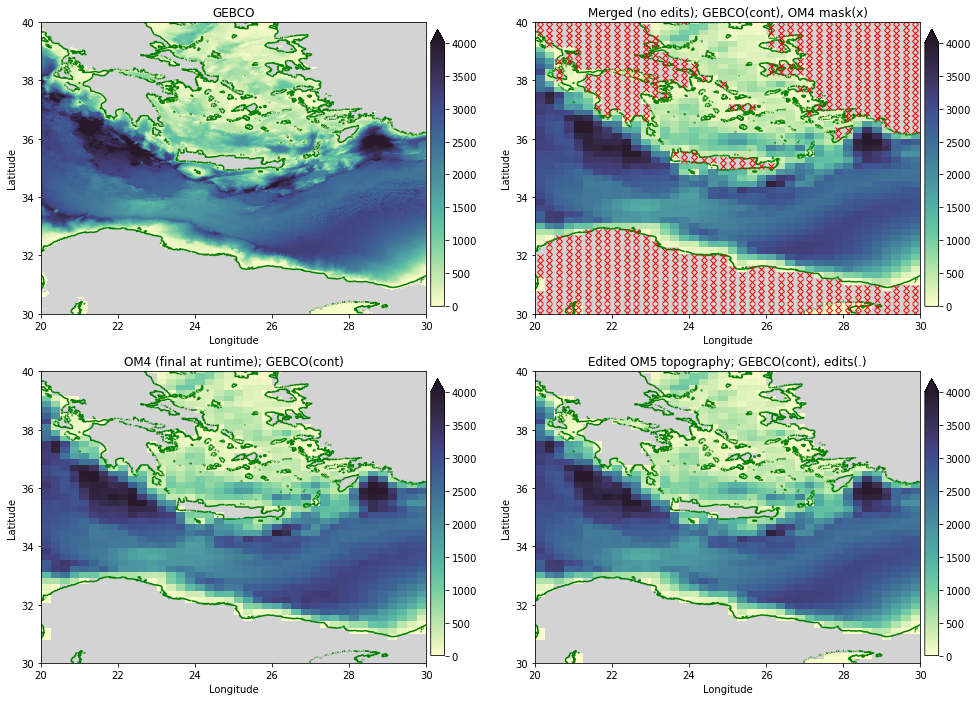

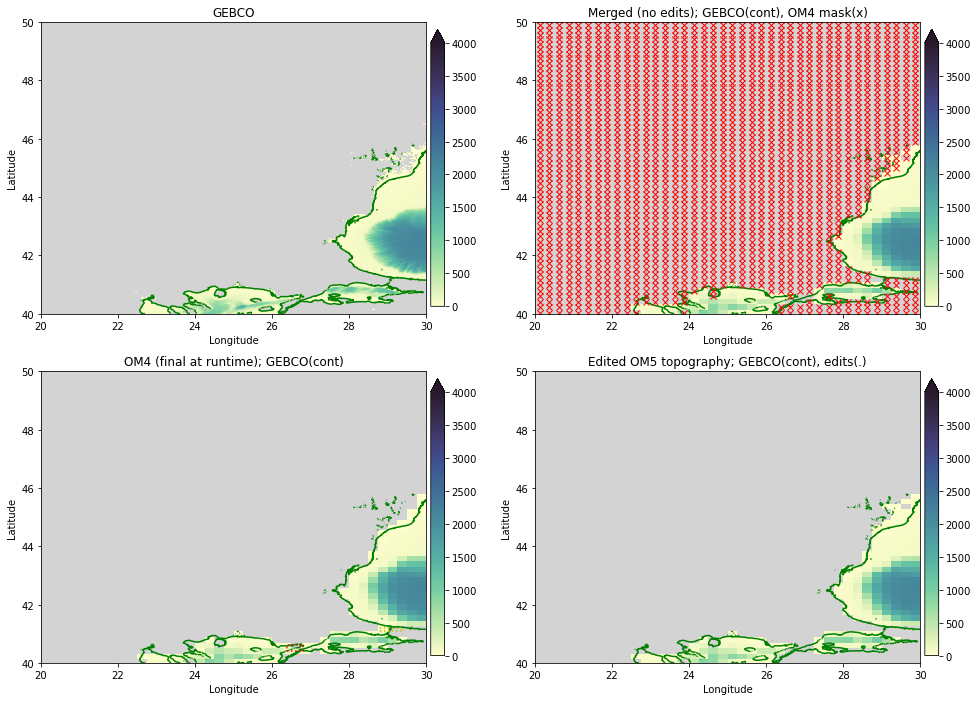

In [13]:
region = Region(25, 35, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);

region = Region(25, 45, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);


Gebco (js:je,is:ie) = 30419:31019,76859:77699
OM4 model (js:je,is:ie) = 660:675,1279:1295
OM5 model (js:je,is:ie) = 741:756,1279:1295
Using xlim = (20.25, 23.75) ylim = (36.75, 39.25)


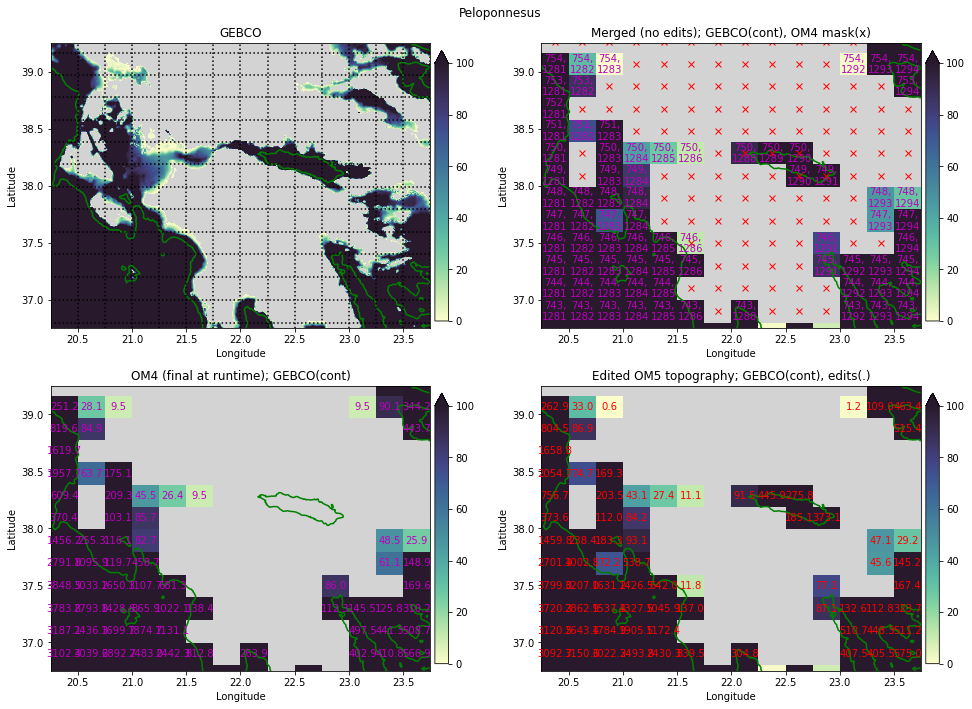

In [14]:
#AJA
# Edits needed to open the northern part of Peloponnesus peninsula of Greece 
#Not using

region = Region(22.0, 38., width_lon=3.5, width_lat=2.5)
# OM5.depth[669,1287] = 70.0

map_region(region, 0, 100, GEBCO, OM4, OM5, 'Peloponnesus');

Gebco (js:je,is:ie) = 31355:31644,78804:79164
OM4 model (js:je,is:ie) = 680:689,1312:1320
OM5 model (js:je,is:ie) = 761:770,1312:1320
Using xlim = (28.35, 29.85) ylim = (40.65, 41.85)


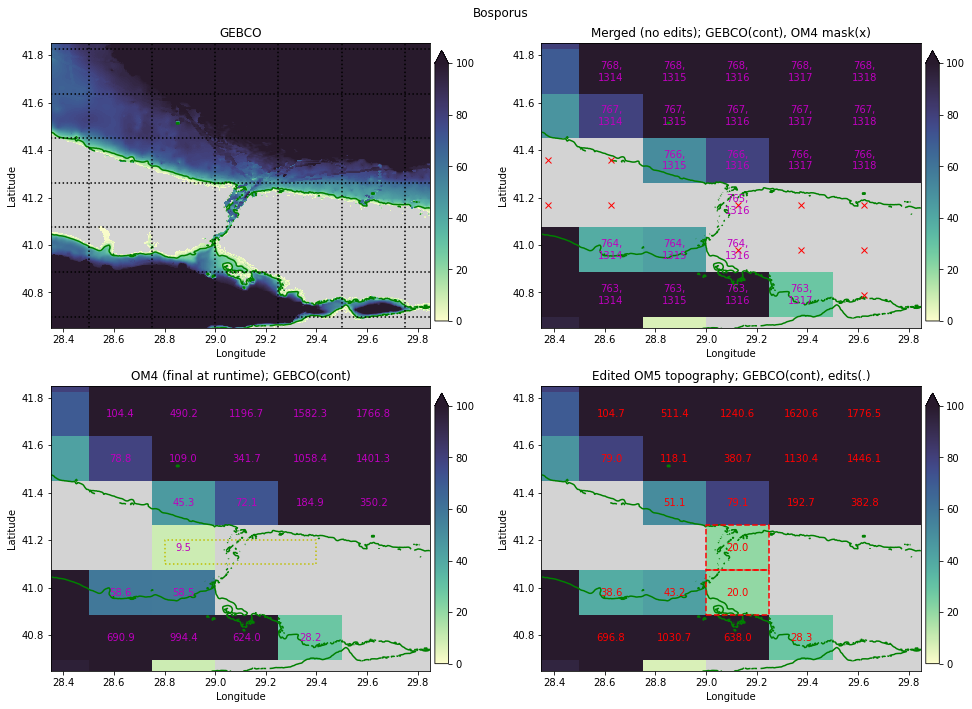

In [15]:
#AJA
# Bosphorus

OM5.depth[764:766,1316] = 20
region = Region(29.10, 41.25, width_lon=1.5, width_lat=1.2)
map_region(region, 0, 100, GEBCO, OM4, OM5, 'Bosphorus', gebco_contours=[20]);

Gebco (js:je,is:ie) = 31139:31499,78228:78588
OM4 model (js:je,is:ie) = 676:685,1302:1310
OM5 model (js:je,is:ie) = 757:766,1302:1310
Using xlim = (25.95, 27.45) ylim = (39.75, 41.25)
Sill = 37.0


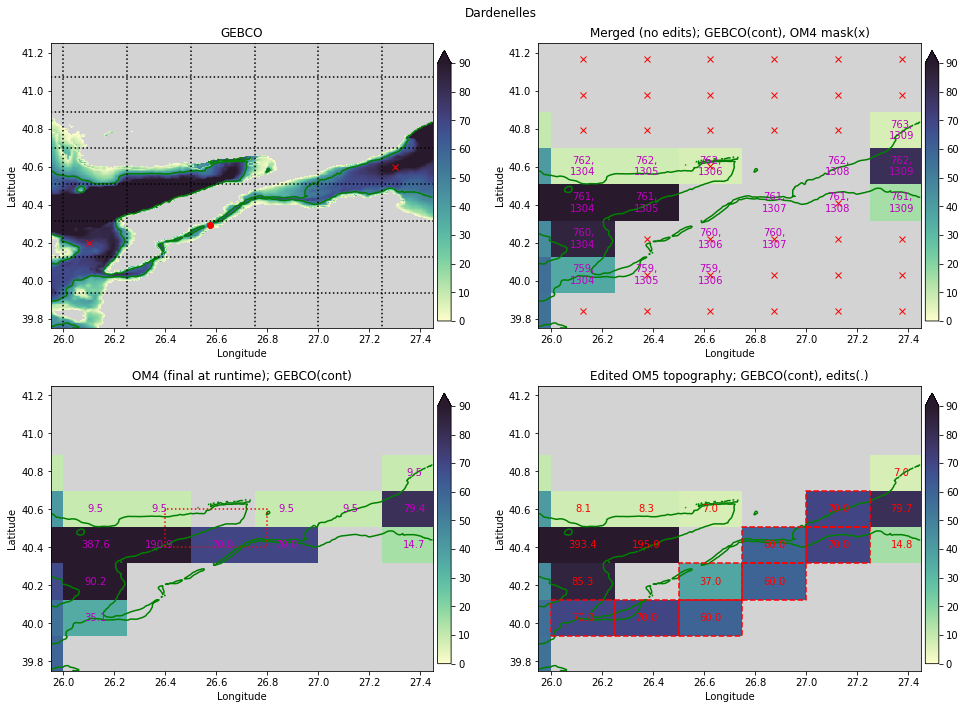

In [16]:
#AJA
# Edits needed to open the Dardenelles connecting the Sea of Marmara to the Aegean Sea 

region = Region(26.70, 40.5, width_lon=1.5, width_lat=1.5)

# Dardenelles
OM5.depth[759,1304] = 70.0
OM5.depth[759,1305] = 70.0
OM5.depth[759,1306] = 60.0
OM5.depth[760,1306] = 37.0 # Based on GEBCO
OM5.depth[760,1307] = 60.0
OM5.depth[761,1307] = 60.0
OM5.depth[761,1308] = 70.0
OM5.depth[762,1308] = 70.0

map_region(region, 0, 90., GEBCO, OM4, OM5, 'Dardenelles', gebco_contours=[50], sill_check=[(26.1,40.2,27.3,40.6)]);

Gebco (js:je,is:ie) = 28799:31199,79199:81599
OM4 model (js:je,is:ie) = 628:679,1318:1360
OM5 model (js:je,is:ie) = 709:760,1318:1360
Using xlim = (30.0, 40.0) ylim = (30.0, 40.0)
Gebco (js:je,is:ie) = 31199:33599,79199:81599
OM4 model (js:je,is:ie) = 677:736,1318:1360
OM5 model (js:je,is:ie) = 758:817,1318:1360
Using xlim = (30.0, 40.0) ylim = (40.0, 50.0)


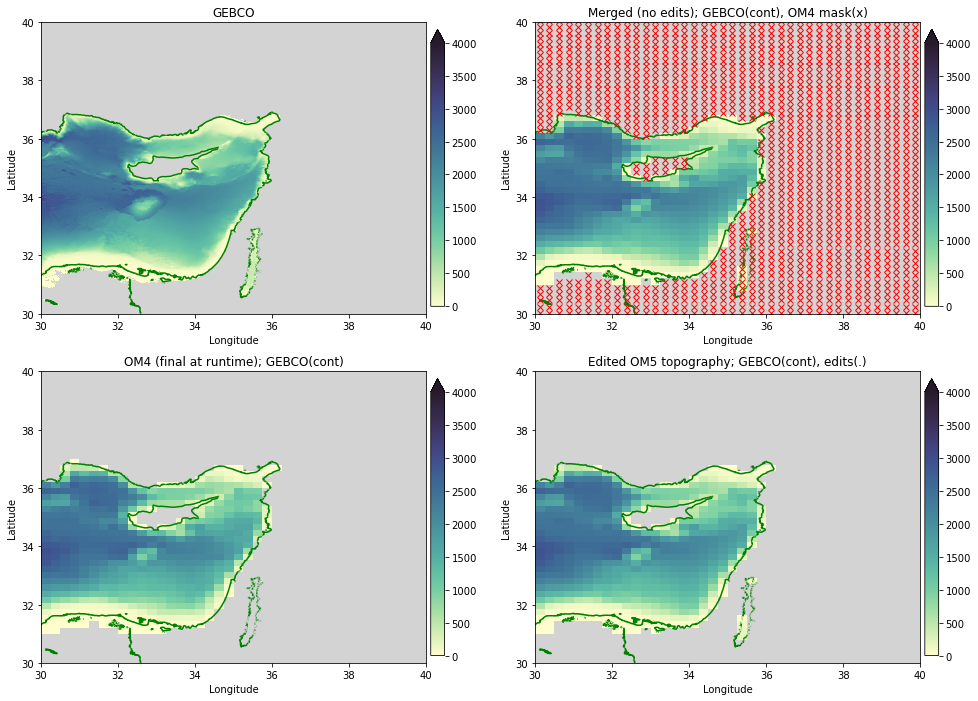

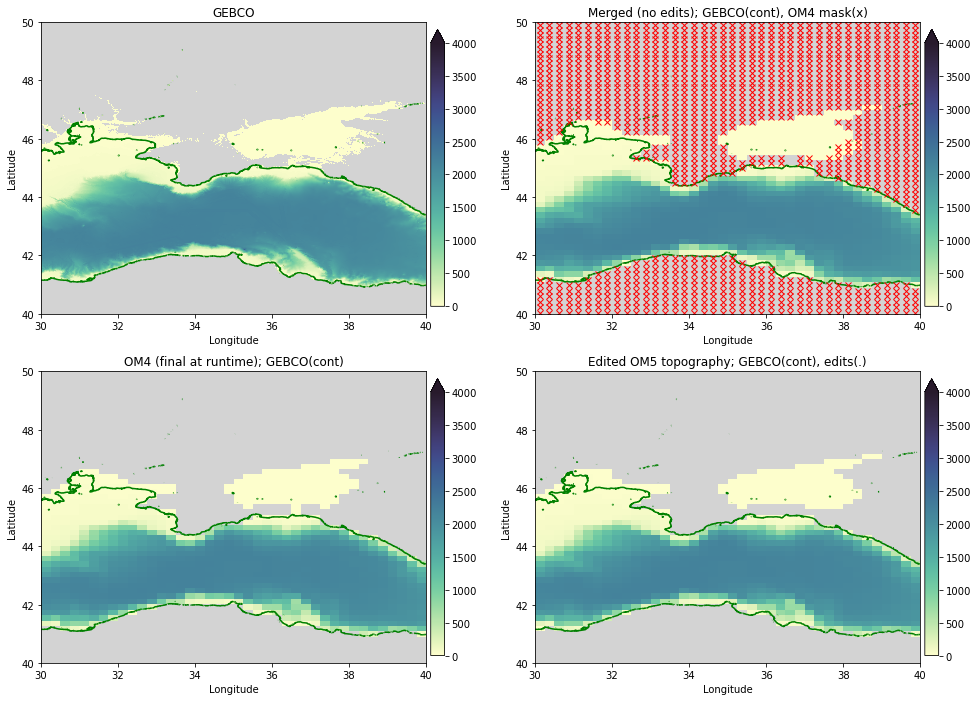

In [17]:
region = Region(35, 35, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);

region = Region(35, 45, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);


Gebco (js:je,is:ie) = 32159:32639,80639:81119
OM4 model (js:je,is:ie) = 698:712,1342:1352
OM5 model (js:je,is:ie) = 779:793,1342:1352
Using xlim = (36.0, 38.0) ylim = (44.0, 46.0)


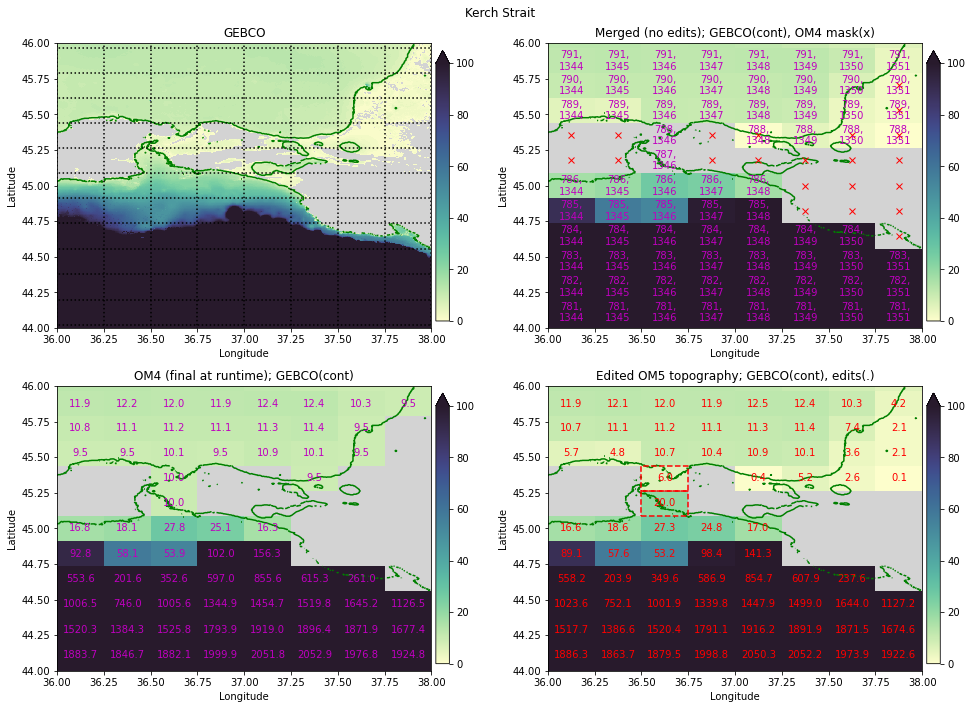

In [18]:
#AJA


OM5.depth[788,1346] = 6
OM5.depth[787,1346] = 20

region = Region(37.0, 45.,width_lat=2,width_lon=2)
map_region(region, 0, 100, GEBCO, OM4, OM5, 'Kerch Strait', gebco_contours=[5]);

Gebco (js:je,is:ie) = 28799:31199,81599:83999
OM4 model (js:je,is:ie) = 628:679,1358:1400
OM5 model (js:je,is:ie) = 709:760,1358:1400
Using xlim = (40.0, 50.0) ylim = (30.0, 40.0)
Gebco (js:je,is:ie) = 31199:33599,81599:83999
OM4 model (js:je,is:ie) = 677:736,1358:1400
OM5 model (js:je,is:ie) = 758:817,1358:1400
Using xlim = (40.0, 50.0) ylim = (40.0, 50.0)


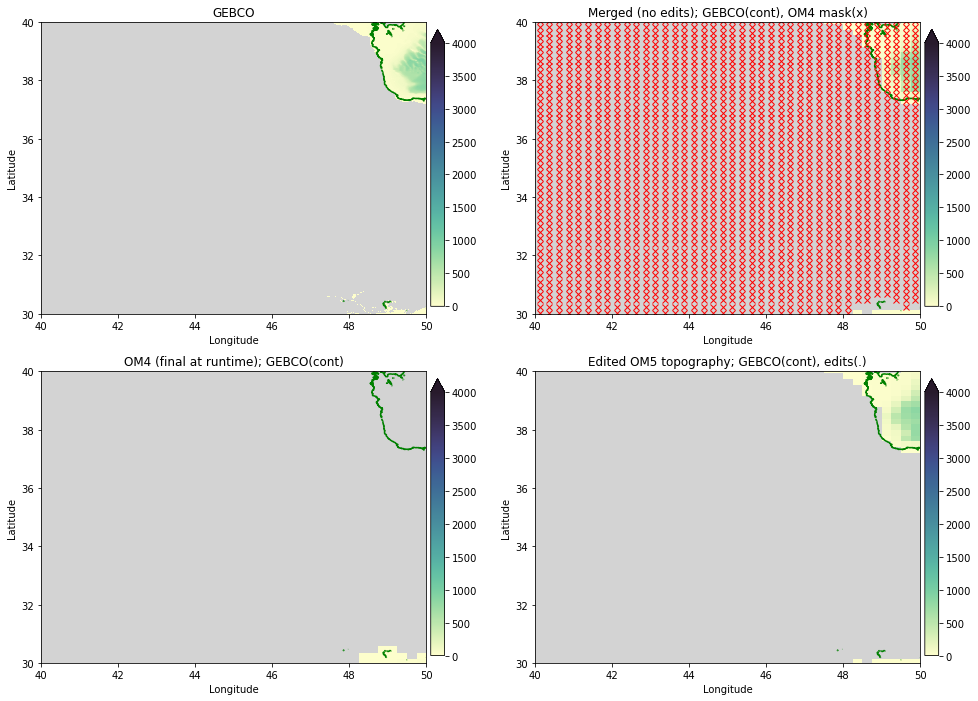

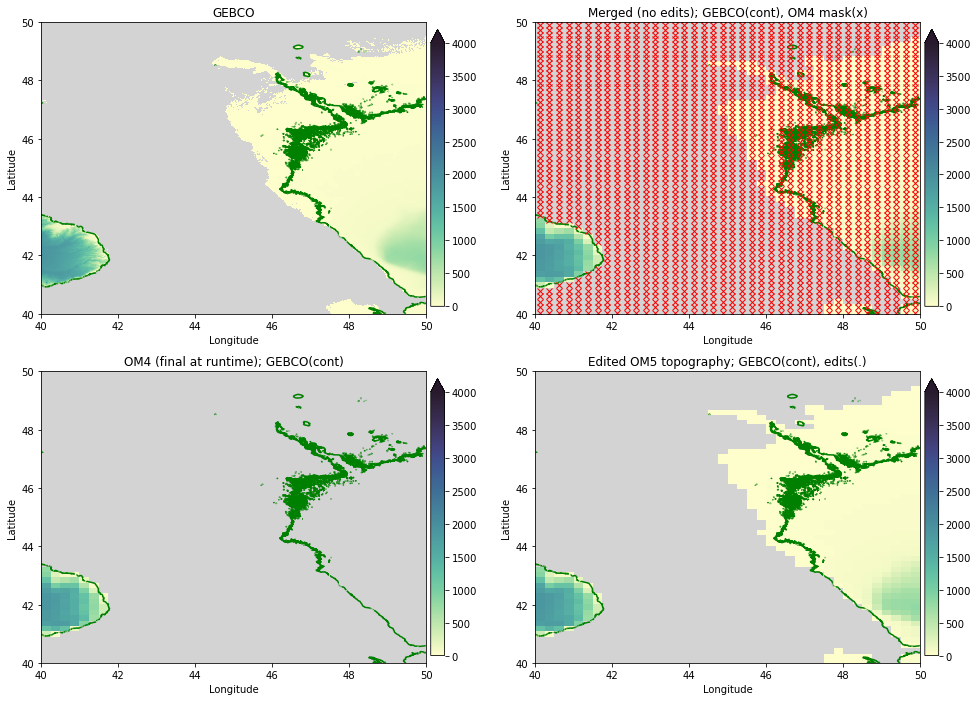

In [19]:
region = Region(45, 35, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);

region = Region(45, 45, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);


Gebco (js:je,is:ie) = 28799:31199,83999:86399
OM4 model (js:je,is:ie) = 628:679,1398:1440
OM5 model (js:je,is:ie) = 709:760,1398:1440
Using xlim = (50.0, 60.0) ylim = (30.0, 40.0)
Gebco (js:je,is:ie) = 31199:33599,83999:86399
OM4 model (js:je,is:ie) = 677:736,1398:1440
OM5 model (js:je,is:ie) = 758:817,1398:1440
Using xlim = (50.0, 60.0) ylim = (40.0, 50.0)


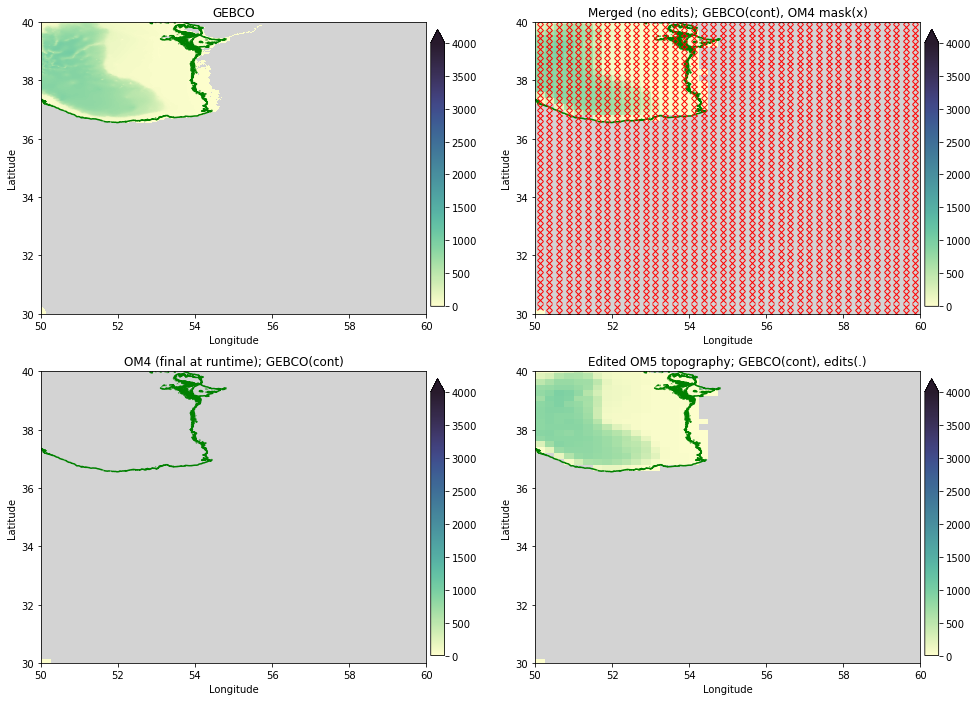

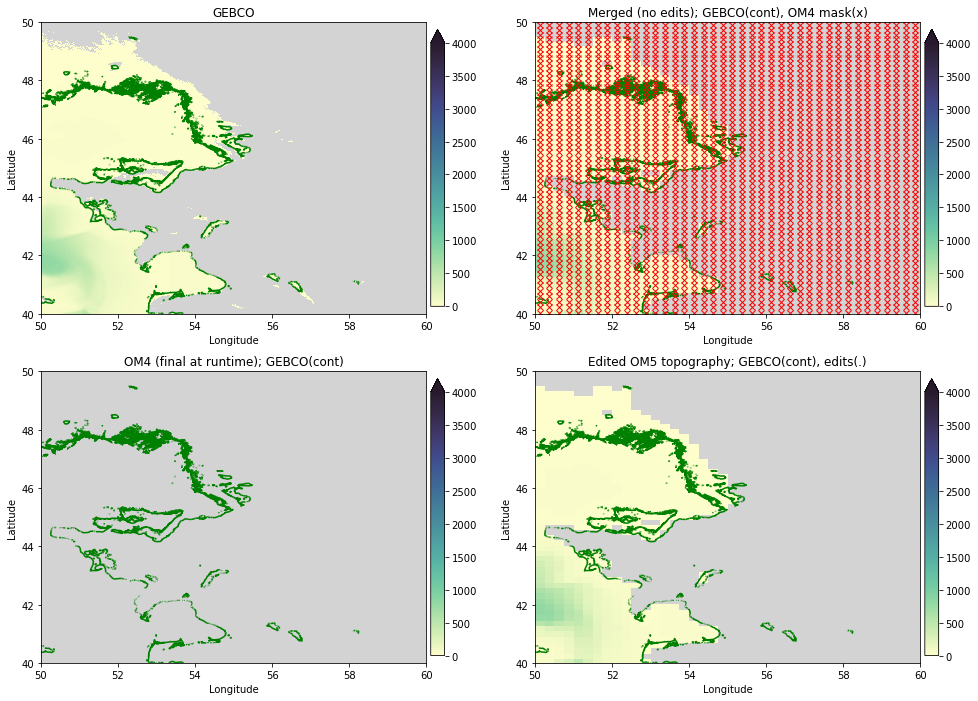

In [20]:
region = Region(55, 35, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);

region = Region(55, 45, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);


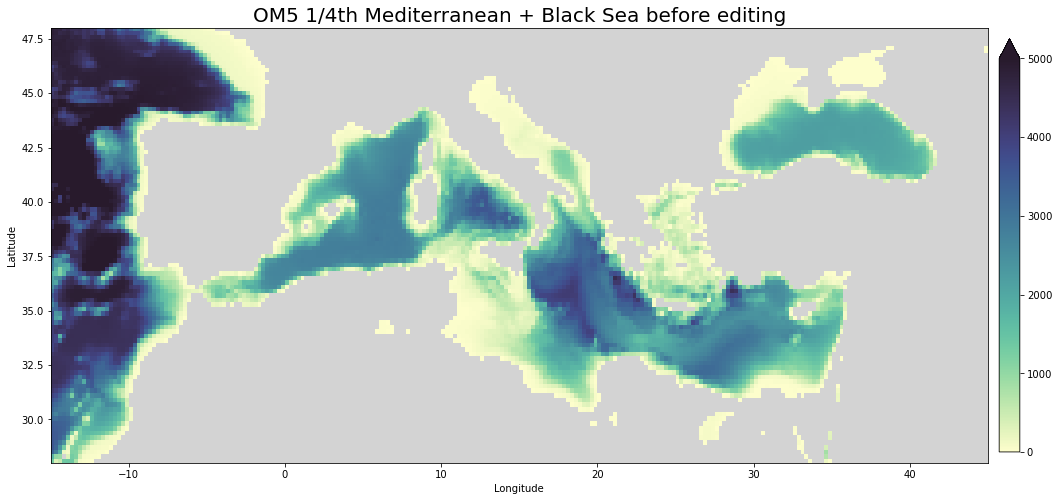

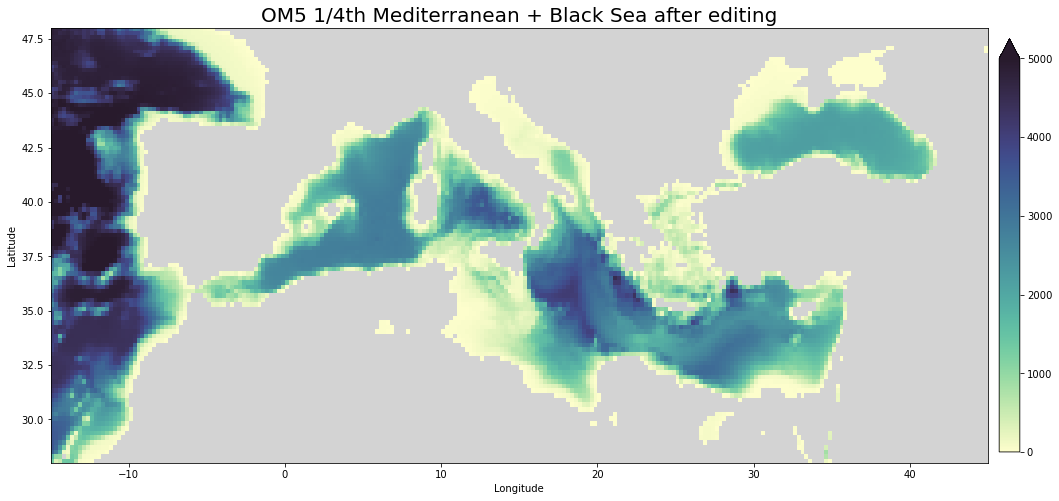

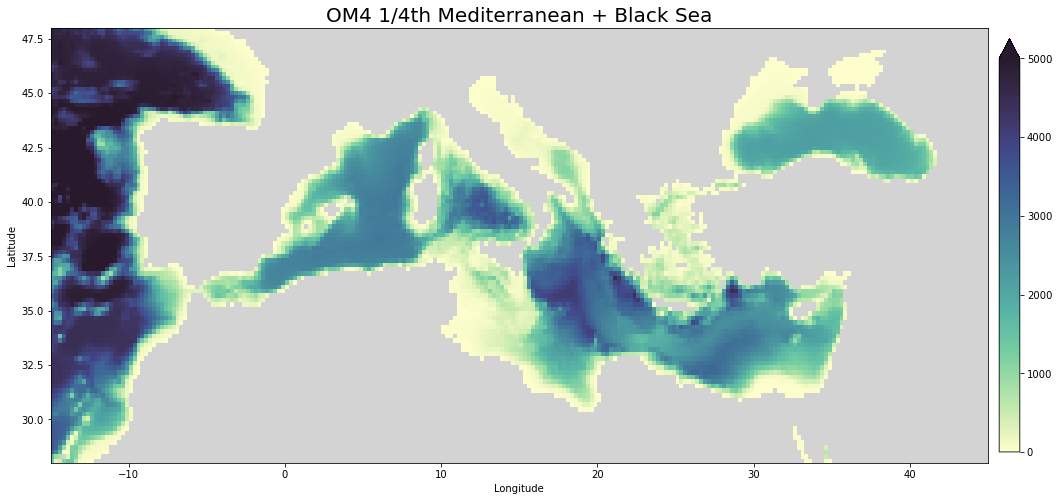

In [21]:
# Broad view of Med and Black Sea after editing 
#
# Warning: the dpi on a typical screen might be insufficient 
# to resolve all the land/sea connections. The Peloponnesus peninsula
# is a good case-in-point where some screen resolutions might show this peninsula  
# disconnected to the rest of Greece, whereas it is in fact connected (as we see in the 
# above cell).  

broadview(OM4,OM5,(-15,45), (28,48), 0, 5000, "Mediterranean + Black Sea")

In [22]:
OM5.write_nc("om5_topo_edits_region_21.nc")

New Depth at jEdit=738 iEdit=1175 set to 335.0
New Depth at jEdit=738 iEdit=1176 set to 296.0
New Depth at jEdit=738 iEdit=1177 set to 580.0
New Depth at jEdit=738 iEdit=1178 set to 580.0
New Depth at jEdit=738 iEdit=1179 set to 580.0
New Depth at jEdit=759 iEdit=1304 set to 70.0
New Depth at jEdit=759 iEdit=1305 set to 70.0
New Depth at jEdit=759 iEdit=1306 set to 60.0
New Depth at jEdit=760 iEdit=1306 set to 37.0
New Depth at jEdit=760 iEdit=1307 set to 60.0
New Depth at jEdit=761 iEdit=1307 set to 60.0
New Depth at jEdit=761 iEdit=1308 set to 70.0
New Depth at jEdit=762 iEdit=1308 set to 70.0
New Depth at jEdit=764 iEdit=1316 set to 20.0
New Depth at jEdit=765 iEdit=1316 set to 20.0
New Depth at jEdit=787 iEdit=1346 set to 20.0
New Depth at jEdit=788 iEdit=1346 set to 6.0
NetCDF file 'om5_topo_edits_region_21.nc' written successfully.
